Import packages and modelclass

In [1]:
%run ../stdPackages.ipynb
from pyDbs import *
from py.modelclass import *
from IPython.display import Image
figs_path = os.path.join(d['curr'],'Figs')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Next we load the database:

In [2]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables','TransmissionLines','lineVariation'],
        'maps': ['LoadMaps','GeneratorsMaps','MarketMaps'],
        'variable2D': ['HourlyVariation','MWP_E','OtherMC'],
        'scalars': ['Scalars']}
path_to_data = os.path.join(d['curr'],'E43','Data','Project Data.xlsx')
db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

Convert variables to floats:

In [3]:
[db.__setitem__(var,db[var].astype(float).sort_index()) for var in db.getTypes('variable').keys()];

Manual Read in of heat areas:

In [4]:
db['g_H'] = db['g_E2g_H'].get_level_values('g_H')

Collect all heat areas in one:

In [5]:
db['g'] = db['g_E'].copy()

In [6]:
DKK_kg = 29.84 #Levelised cost -> Reference!
kWh_kg = 39
Euro_DKK = 1/7.45
MWh_kWh = 1/1000
GJ_MWh = 0.277778

λ_H2 = DKK_kg*(1/kWh_kg)*Euro_DKK*(1/MWh_kWh)

In [7]:
"""
Both Projects at politically approved stage
"""
m = mSimple(db) # initialize using the database 'db' from above.
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Index values: [('DK1', 'DK2', 1) ('DK1', 'DK2', 2) ('DK1', 'DK2', 3) ...
 ('DK2', 'DK1', 8758) ('DK2', 'DK1', 8759) ('DK2', 'DK1', 8760)]
Names: ['g_E', 'g_E_alias', 'h'], Expected levels: 3
Index values: [('DK1_Central', 1, 'id_DK1_Central_BH_Biomass')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Natgas')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Oil') ...
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH_Biomass')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_SH')]
Names: ['g_H', 'h', 'id'], Expected levels: 3
Index values: [('DK1', 1, 'id_DK1_Central_BP_Biogas')
 ('DK1', 1, 'id_DK1_Central_BP_Biomass')
 ('DK1', 1, 'id_DK1_Central_BP_Coal') ... ('DK2', 8760, 'id_DK2_nan_PV')
 ('DK2', 8760, 'id_DK2_nan_WL') ('DK2', 8760, 'id_DK2_nan_WS')]
Names: ['g_E', 'h', 'id'], Expected levels: 3
Index values: [('DK1_ExportTo_DELU', 'DK1', 1

In [8]:
"""
Original Model without Energy Islands
"""
path_to_data = os.path.join(d['curr'],'E43','Data','E43_Data.xlsx')
dbtake1 = read.dbFromWB(path_to_data, kwargs)
readSets(dbtake1)
[dbtake1.__setitem__(var,dbtake1[var].astype(float).sort_index()) for var in dbtake1.getTypes('variable').keys()];
dbtake1['g_H'] = dbtake1['g_E2g_H'].get_level_values('g_H')
dbtake1['g'] = dbtake1['g_E'].copy()
mtake1 = mSimple(dbtake1)
mtake1()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Index values: [('DK1', 'DK2', 1) ('DK1', 'DK2', 2) ('DK1', 'DK2', 3) ...
 ('DK2', 'DK1', 8758) ('DK2', 'DK1', 8759) ('DK2', 'DK1', 8760)]
Names: ['g_E', 'g_E_alias', 'h'], Expected levels: 3
Index values: [('DK1_Central', 1, 'id_DK1_Central_BH_Biomass')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Natgas')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Oil') ...
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH_Biomass')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_SH')]
Names: ['g_H', 'h', 'id'], Expected levels: 3
Index values: [('DK1', 1, 'id_DK1_Central_BP_Biogas')
 ('DK1', 1, 'id_DK1_Central_BP_Biomass')
 ('DK1', 1, 'id_DK1_Central_BP_Coal') ... ('DK2', 8760, 'id_DK2_nan_PV')
 ('DK2', 8760, 'id_DK2_nan_WL') ('DK2', 8760, 'id_DK2_nan_WS')]
Names: ['g_E', 'h', 'id'], Expected levels: 3
Index values: [('DK1_ExportTo_DELU', 'DK1', 1

In [9]:
"""
Only Bornholm at politically approved stage
"""
path_to_data = os.path.join(d['curr'],'E43','Data','Project Data_Without NorthSea.xlsx')
dbonlybornholm = read.dbFromWB(path_to_data, kwargs)
readSets(dbonlybornholm)
[dbonlybornholm.__setitem__(var,dbonlybornholm[var].astype(float).sort_index()) for var in dbonlybornholm.getTypes('variable').keys()];
dbonlybornholm['g_H'] = dbonlybornholm['g_E2g_H'].get_level_values('g_H')
dbonlybornholm['g'] = dbonlybornholm['g_E'].copy()
monlybornholm = mSimple(dbonlybornholm)
monlybornholm()



Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Index values: [('DK1', 'DK2', 1) ('DK1', 'DK2', 2) ('DK1', 'DK2', 3) ...
 ('DK2', 'DK1', 8758) ('DK2', 'DK1', 8759) ('DK2', 'DK1', 8760)]
Names: ['g_E', 'g_E_alias', 'h'], Expected levels: 3
Index values: [('DK1_Central', 1, 'id_DK1_Central_BH_Biomass')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Natgas')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Oil') ...
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH_Biomass')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_SH')]
Names: ['g_H', 'h', 'id'], Expected levels: 3
Index values: [('DK1', 1, 'id_DK1_Central_BP_Biogas')
 ('DK1', 1, 'id_DK1_Central_BP_Biomass')
 ('DK1', 1, 'id_DK1_Central_BP_Coal') ... ('DK2', 8760, 'id_DK2_nan_PV')
 ('DK2', 8760, 'id_DK2_nan_WL') ('DK2', 8760, 'id_DK2_nan_WS')]
Names: ['g_E', 'h', 'id'], Expected levels: 3
Index values: [('DK1_ExportTo_DELU', 'DK1', 1

In [10]:
"""
Both projects with full projected capacity
"""
path_to_data = os.path.join(d['curr'],'E43','Data','Project_Data_Long_Term_All.xlsx')
dball = read.dbFromWB(path_to_data, kwargs)
readSets(dball)
[dball.__setitem__(var,dball[var].astype(float).sort_index()) for var in dball.getTypes('variable').keys()];
dball['g_H'] = dball['g_E2g_H'].get_level_values('g_H')
dball['g'] = dball['g_E'].copy()
mall = mSimple(dball)
mall()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Index values: [('DK1', 'DK2', 1) ('DK1', 'DK2', 2) ('DK1', 'DK2', 3) ...
 ('DK2', 'DK1', 8758) ('DK2', 'DK1', 8759) ('DK2', 'DK1', 8760)]
Names: ['g_E', 'g_E_alias', 'h'], Expected levels: 3
Index values: [('DK1_Central', 1, 'id_DK1_Central_BH_Biomass')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Natgas')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Oil') ...
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH_Biomass')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_SH')]
Names: ['g_H', 'h', 'id'], Expected levels: 3
Index values: [('DK1', 1, 'id_DK1_Central_BP_Biogas')
 ('DK1', 1, 'id_DK1_Central_BP_Biomass')
 ('DK1', 1, 'id_DK1_Central_BP_Coal') ... ('DK2', 8760, 'id_DK2_nan_PV')
 ('DK2', 8760, 'id_DK2_nan_WL') ('DK2', 8760, 'id_DK2_nan_WS')]
Names: ['g_E', 'h', 'id'], Expected levels: 3
Index values: [('DK1_ExportTo_DELU', 'DK1', 1

In [11]:
"""
Only Bornholm at full projected capacity
"""
path_to_data = os.path.join(d['curr'],'E43','Data','Project_Data_Long_Term_Bornholm.xlsx')
dbbornholm_full = read.dbFromWB(path_to_data, kwargs)
readSets(dbbornholm_full)
[dbbornholm_full.__setitem__(var,dbbornholm_full[var].astype(float).sort_index()) for var in dbbornholm_full.getTypes('variable').keys()];
dbbornholm_full['g_H'] = dbbornholm_full['g_E2g_H'].get_level_values('g_H')
dbbornholm_full['g'] = dbbornholm_full['g_E'].copy()
mbornholm_full = mSimple(dbbornholm_full)
mbornholm_full()


Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Index values: [('DK1', 'DK2', 1) ('DK1', 'DK2', 2) ('DK1', 'DK2', 3) ...
 ('DK2', 'DK1', 8758) ('DK2', 'DK1', 8759) ('DK2', 'DK1', 8760)]
Names: ['g_E', 'g_E_alias', 'h'], Expected levels: 3
Index values: [('DK1_Central', 1, 'id_DK1_Central_BH_Biomass')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Natgas')
 ('DK1_Central', 1, 'id_DK1_Central_BH_Oil') ...
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_IndustryH_Biomass')
 ('DK2_SmallDecentral', 8760, 'id_DK2_SmallDecentral_SH')]
Names: ['g_H', 'h', 'id'], Expected levels: 3
Index values: [('DK1', 1, 'id_DK1_Central_BP_Biogas')
 ('DK1', 1, 'id_DK1_Central_BP_Biomass')
 ('DK1', 1, 'id_DK1_Central_BP_Coal') ... ('DK2', 8760, 'id_DK2_nan_PV')
 ('DK2', 8760, 'id_DK2_nan_WL') ('DK2', 8760, 'id_DK2_nan_WS')]
Names: ['g_E', 'h', 'id'], Expected levels: 3
Index values: [('DK1_ExportTo_DELU', 'DK1', 1

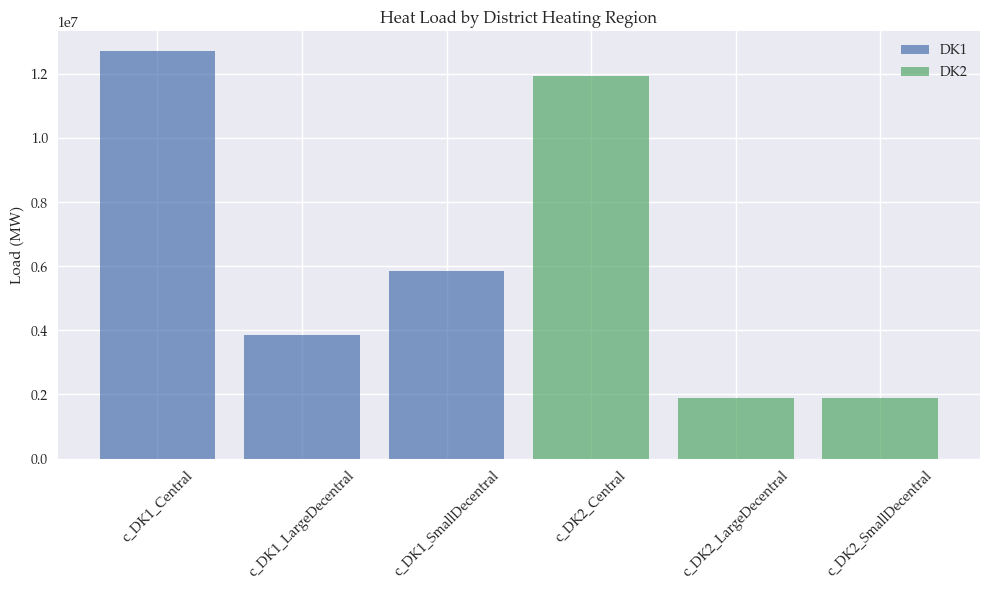

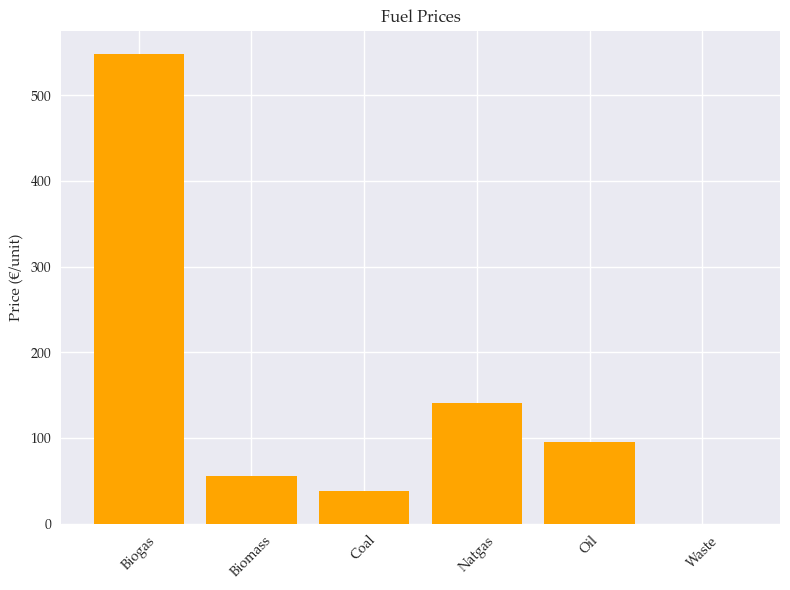

In [12]:
#Create DataFrames
load_h_df = pd.Series(db['Load_H']).rename_axis('Region').reset_index(name='Load_H')
fuel_price_df = pd.Series(db['FuelPrice']).rename_axis('Fuel').reset_index(name='FuelPrice')

# Filter Regions DK1 and DK2 from Load Data
load_h_df['Zone'] = load_h_df['Region'].apply(lambda x: 'DK1' if 'DK1' in x else 'DK2')

# Plot 1: Load_H per Region
plt.figure(figsize=(10, 6))
for zone in ['DK1', 'DK2']:
    subset = load_h_df[load_h_df['Zone'] == zone]
    plt.bar(subset['Region'], subset['Load_H'], label=f'{zone}', alpha=0.7)

plt.title("Heat Load by District Heating Region")
plt.ylabel("Load (MW)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Fuel Prices
plt.figure(figsize=(8, 6))
plt.bar(fuel_price_df['Fuel'], fuel_price_df['FuelPrice'], color='orange')
plt.title("Fuel Prices")
plt.ylabel("Price (€/unit)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

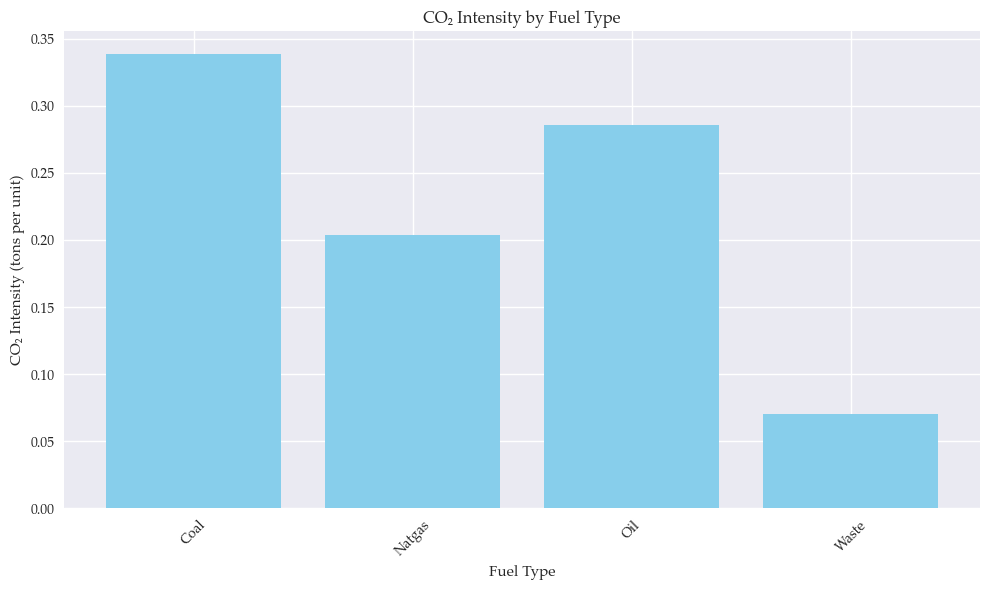

In [13]:
import matplotlib.pyplot as plt

# Extract data from db
emission_intensity = db['EmissionIntensity']

# Prepare data for plotting
fuel_types = emission_intensity.index.get_level_values(0).unique()
intensity_values = [emission_intensity.loc[fuel, 'CO2'] for fuel in fuel_types]

# Plot CO2 Intensity per Fuel Type
plt.figure(figsize=(10, 6))
plt.bar(fuel_types, intensity_values, color='skyblue')

# Add labels and title
plt.title('CO₂ Intensity by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO₂ Intensity (tons per unit)')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


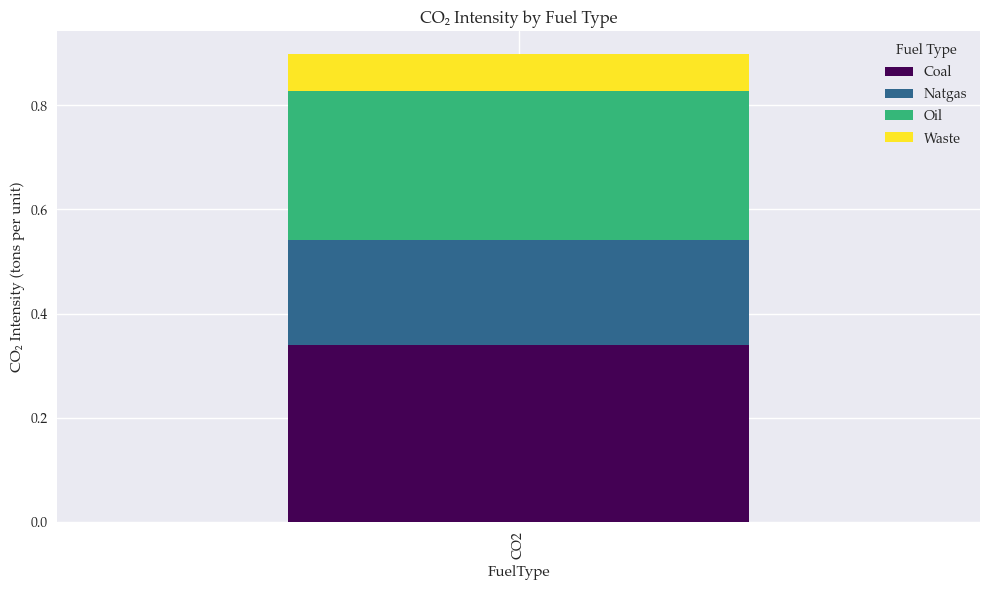

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract data
emission_intensity = db['EmissionIntensity']

# Unstack data to get Fuel Types vs Regions
intensity_unstacked = emission_intensity.unstack(level=1)  # Unstack region level

# Plot Stacked Bar Chart
intensity_unstacked.T.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

# Add labels and title
plt.title('CO₂ Intensity by Fuel Type')
plt.xlabel('FuelType')
plt.ylabel('CO₂ Intensity (tons per unit)')
plt.legend(title='Fuel Type')
plt.tight_layout()

# Display the plot
plt.show()

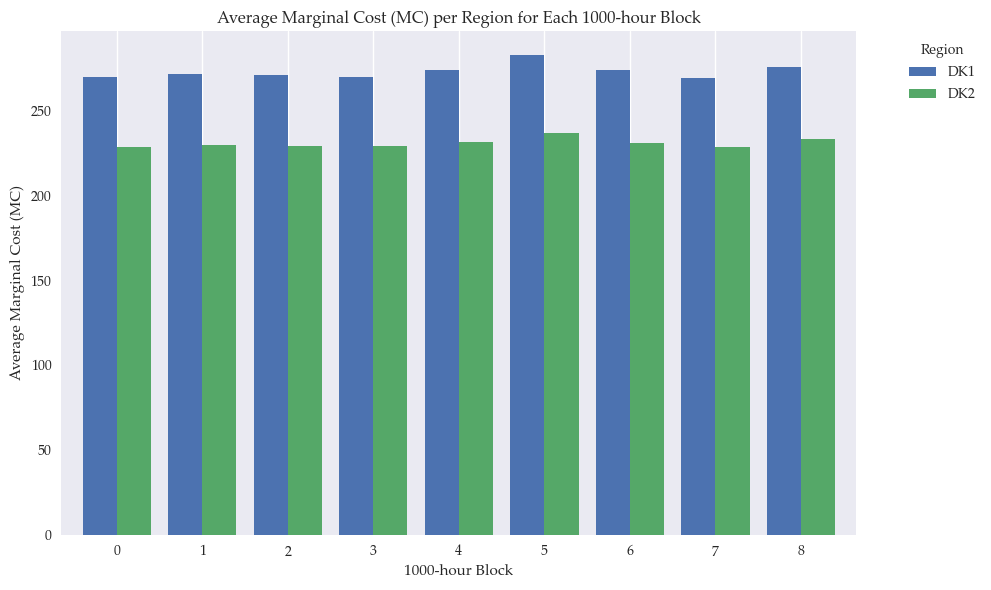

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume db['mc'] is the input series
mc = db['mc']

# Step 1: Reset index and create 'Region' column
mc_df = mc.reset_index(name='mc')
mc_df['Region'] = mc_df['id'].str.split('_').str[1]  # Extract "DK1", "DK2", etc.

# Step 2: Group by 1000-hour intervals and Region
mc_df['h_block'] = (mc_df['h'] - 1) // 1000  # Create 1000-hour blocks (0, 1, 2, ...)
aggregated_mc = mc_df.groupby(['h_block', 'Region']).agg({'mc': 'mean'}).reset_index()

# Step 3: Pivot the DataFrame to prepare it for a bar plot
pivot_df = aggregated_mc.pivot(index='h_block', columns='Region', values='mc')

# Step 4: Plot the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Adding labels and title
plt.title('Average Marginal Cost (MC) per Region for Each 1000-hour Block')
plt.xlabel('1000-hour Block')
plt.ylabel('Average Marginal Cost (MC)')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


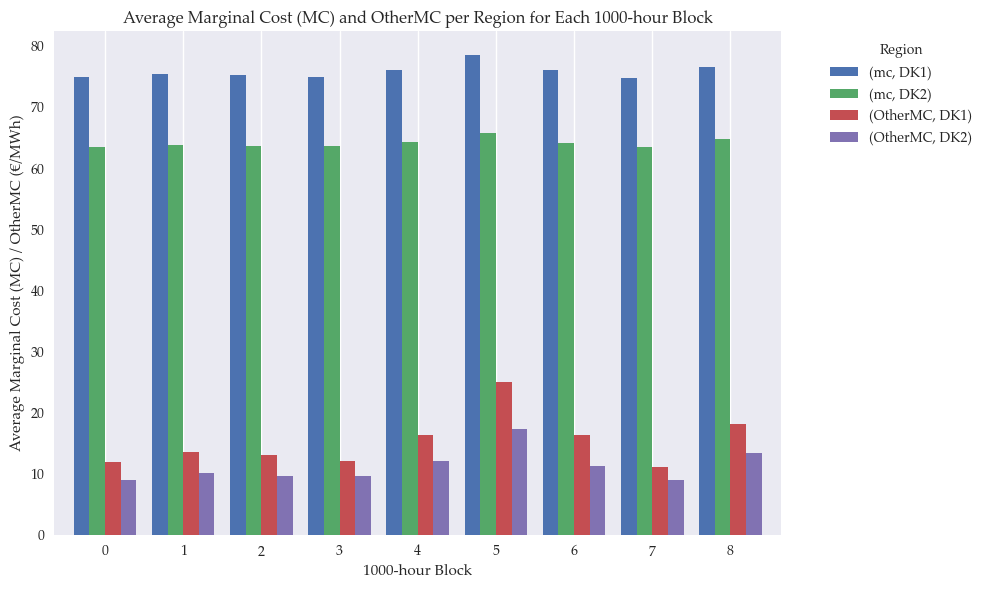

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume db['mc'] and db['OtherMC'] are the input series
mc = db['mc'] * GJ_MWh
other_mc = db['OtherMC']

# Step 1: Reset index and create 'Region' column
mc_df = mc.reset_index(name='mc')
other_mc_df = other_mc.reset_index(name='OtherMC')

# Combine both 'mc' and 'OtherMC' into a single DataFrame
df_combined = pd.merge(mc_df, other_mc_df, on=['h', 'id'], how='inner')

# Extract region from the 'id' column
df_combined['Region'] = df_combined['id'].str.split('_').str[1]  # Extract "DK1", "DK2", etc.

# Step 2: Group by 1000-hour intervals and Region
df_combined['h_block'] = (df_combined['h'] - 1) // 1000  # Create 1000-hour blocks (0, 1, 2, ...)
aggregated_mc = df_combined.groupby(['h_block', 'Region']).agg({'mc': 'mean', 'OtherMC': 'mean'}).reset_index()

# Step 3: Pivot the DataFrame to prepare it for a bar plot
pivot_df = aggregated_mc.pivot(index='h_block', columns='Region', values=['mc', 'OtherMC'])

# Step 4: Plot the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Adding labels and title
plt.title('Average Marginal Cost (MC) and OtherMC per Region for Each 1000-hour Block')
plt.xlabel('1000-hour Block')
plt.ylabel('Average Marginal Cost (MC) / OtherMC (€/MWh)')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
"""
MOC for full political scenario 
"""

def MOC(type):
    # Combine 'mc' and 'OtherMC'
    combined_mc = db['mc'] + db['OtherMC']

    # Group by 'id' and calculate the mean
    average_mc_per_id = combined_mc.groupby('id').mean()
    
    title = {'H' : 'Heat', 'E' : 'Energy'}
        

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # Settings
    ϵ = np.finfo(float).eps * 1e10
    lower_point = 0
    upper_point = average_mc_per_id.max() * 1.1  # Set upper_point to 10% above the max price

    # Combine 'mc' and 'OtherMC', and compute the average price by 'id'
    combined_mc = db['mc'] + db['OtherMC']
    average_mc_per_id = combined_mc.groupby('id').mean()

    # Use 'GeneratingCap_E' as generation capacity (q)
    generation_capacity = db['GeneratingCap_'+type].groupby('id').mean()

    # Create DataFrame for merit order curve
    df = pd.DataFrame({
        'q': generation_capacity,
        'p': average_mc_per_id
    }).dropna()  # Drop any rows with missing values

    # Sort and calculate cumulative capacity
    df = df.sort_values('p')
    df['q_cs'] = df['q'].cumsum()

    # Add upper points for step plotting
    df_up = df.copy()
    df_up['q_cs'] = df_up['q_cs'] + ϵ
    df_up['p'] = df_up['p'].shift(-1).fillna(upper_point)
    df = pd.concat([df, df_up], axis=0).sort_values(['p', 'q_cs'])

    # Merit order curve plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the merit order curve
    df.set_index('q_cs')['p'].plot(ax=ax, drawstyle="steps-post", label="Merit Order Curve", color="blue")
    ax.set_title(f'Merit Order Curve for {title[type]} Plants')
    ax.set_xlabel('Cumulative Capacity (MW)')
    ax.set_ylabel('Price (dkk/GJ)')
    ax.grid(True)
    ax.legend()

    # Save and show the figure
    fig.tight_layout()
    plt.show()


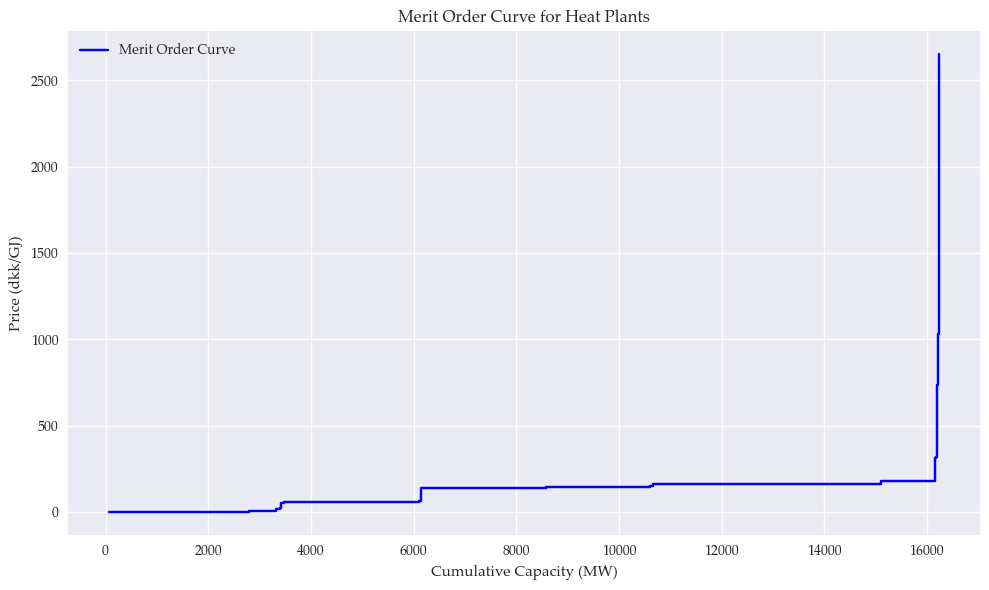

In [18]:
MOC('H')

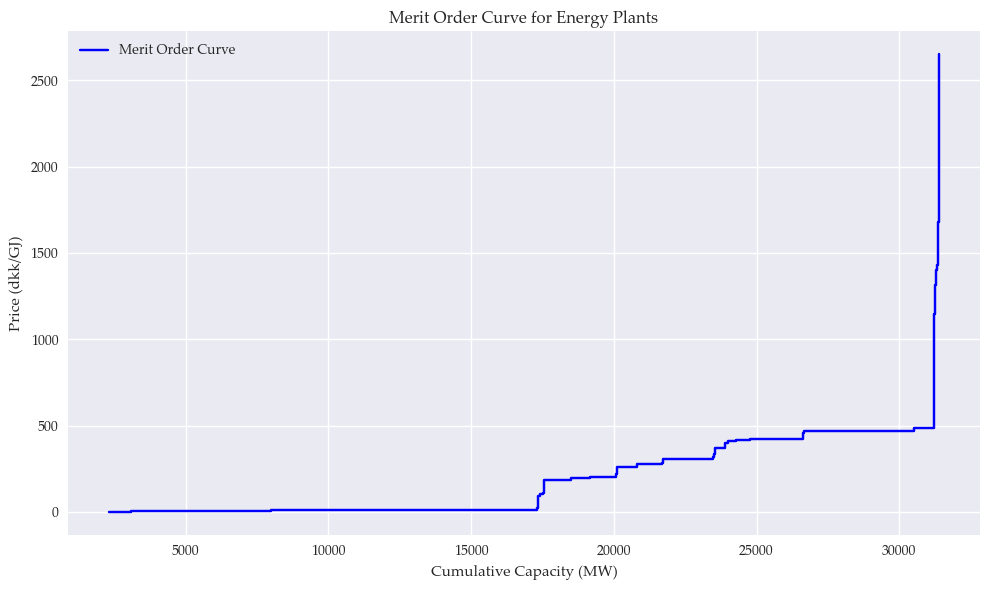

In [19]:
MOC("E")

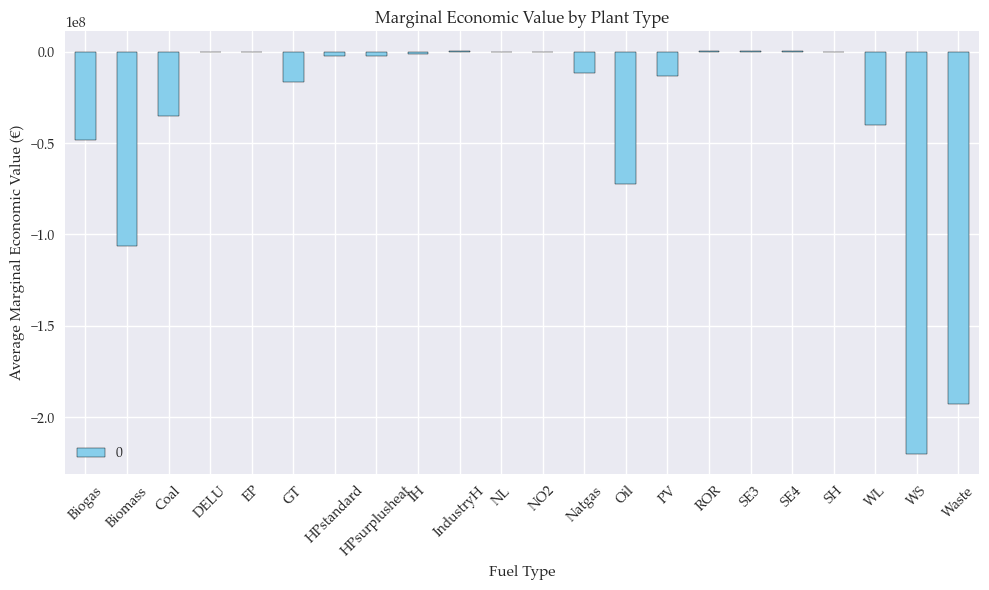

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming db['marginalEconomicValue'] is a Series with 'id' as the index

# Convert the marginal economic value Series to a DataFrame (if it's not already)
marginal_economic_value_df = db['marginalEconomicValue'].to_frame()

# Extract fuel type from the 'id' index (the 5th part of the id string)
marginal_economic_value_df['fuel_type'] = marginal_economic_value_df.index.str.split('_').str[-1]

# Group by fuel type and calculate the mean marginal economic value
marginal_economic_value_by_fueltype = marginal_economic_value_df.groupby('fuel_type').mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
marginal_economic_value_by_fueltype.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Customize the plot
ax.set_title('Marginal Economic Value by Plant Type')
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Average Marginal Economic Value (€)')
ax.set_xticklabels(marginal_economic_value_by_fueltype.index, rotation=45)
ax.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


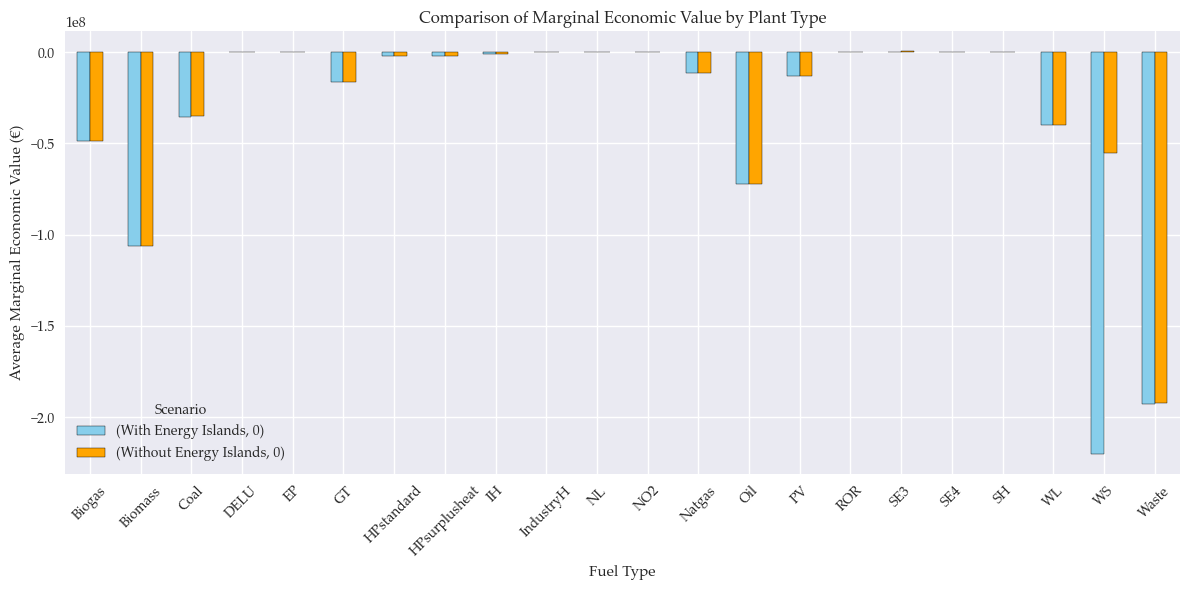

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming db and dbtake1 are two databases with the same structure
# Process the first database
marginal_economic_value_df = db['marginalEconomicValue'].to_frame()
marginal_economic_value_df['fuel_type'] = marginal_economic_value_df.index.str.split('_').str[-1]
marginal_economic_value_by_fueltype = marginal_economic_value_df.groupby('fuel_type').mean()

# Process the second database
marginal_economic_value_df_take1 = dbtake1['marginalEconomicValue'].to_frame()
marginal_economic_value_df_take1['fuel_type'] = marginal_economic_value_df_take1.index.str.split('_').str[-1]
marginal_economic_value_by_fueltype_take1 = marginal_economic_value_df_take1.groupby('fuel_type').mean()

# Combine both results into a single DataFrame for comparison
comparison_df = pd.concat(
    [marginal_economic_value_by_fueltype, marginal_economic_value_by_fueltype_take1],
    axis=1,
    keys=['With Energy Islands', 'Without Energy Islands']
)

# Plot the comparison as a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
comparison_df.plot(kind='bar', ax=ax, color=['skyblue', 'orange'], edgecolor='black')

# Customize the plot
ax.set_title('Comparison of Marginal Economic Value by Plant Type')
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Average Marginal Economic Value (€)')
ax.set_xticklabels(comparison_df.index, rotation=45)
ax.legend(title='Scenario', loc='best')  # Updated legend title
ax.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


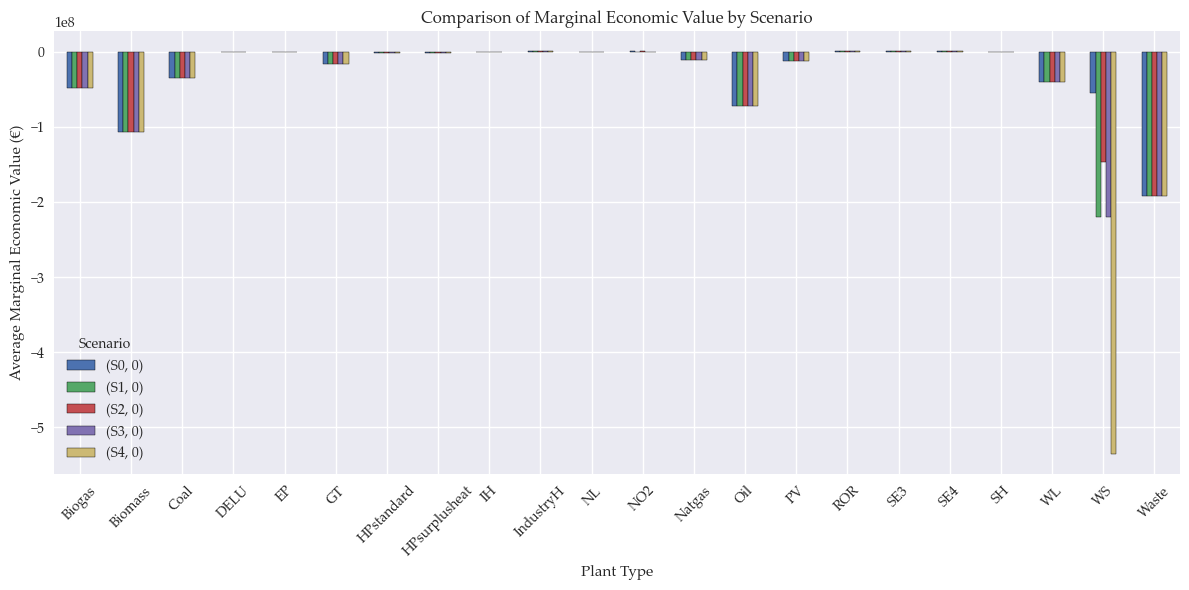

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# List of databases with corresponding labels
databases = {
    'S0': dbtake1,
    'S1': db,
    'S2': dbonlybornholm,
    'S3': dbbornholm_full,
    'S4': dball
}

# Initialize an empty list to collect data
marginal_values = []

# Process each database and calculate the marginal economic value
for label, database in databases.items():
    marginal_economic_value_df = database['marginalEconomicValue'].to_frame()
    marginal_economic_value_df['fuel_type'] = marginal_economic_value_df.index.str.split('_').str[-1]
    marginal_economic_value_by_fueltype = marginal_economic_value_df.groupby('fuel_type').mean()
    
    # Append the results with a label
    marginal_values.append(marginal_economic_value_by_fueltype)

# Combine all results into a single DataFrame for comparison
comparison_df = pd.concat(marginal_values, axis=1, keys=databases.keys())

# Plot the comparison as a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
comparison_df.plot(kind='bar', ax=ax, edgecolor='black')

# Customize the plot
ax.set_title('Comparison of Marginal Economic Value by Scenario')
ax.set_xlabel('Plant Type')
ax.set_ylabel('Average Marginal Economic Value (€)')
ax.set_xticklabels(comparison_df.index, rotation=45)
ax.legend(title='Scenario', loc='best')  # Updated legend title
ax.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
"""DELU (Germany and Luxembourg)
NO2 (Southern Norway)
SE3, SE4 (Sweden)
"""

'DELU (Germany and Luxembourg)\nNO2 (Southern Norway)\nSE3, SE4 (Sweden)\n'

In [24]:
def MOC(type):
    """
    Plots the Merit Order Curve for both `db` and `dbtake1`, overlaying their results.
    
    Parameters:
    - type: 'H' for Heat or 'E' for Energy
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    def prepare_merit_order_curve(database, label, color):
        # Convert 'mc' from EUR/GJ to EUR/MWh
        mc_converted = database['mc'] * GJ_MWh
        
        # Combine 'mc' (converted) and 'OtherMC'
        combined_mc = mc_converted + database['OtherMC']
        
        # Group by 'id' and calculate the mean
        average_mc_per_id = combined_mc.groupby('id').mean()
        
        # Use 'GeneratingCap_E' or 'GeneratingCap_H' based on `type`
        generation_capacity = database['GeneratingCap_' + type].groupby('id').mean()
        
        # Create DataFrame for merit order curve
        df = pd.DataFrame({
            'q': generation_capacity,
            'p': average_mc_per_id
        }).dropna()  # Drop rows with missing values
        
        # Sort and calculate cumulative capacity
        df = df.sort_values('p')
        df['q_cs'] = df['q'].cumsum()
        
        # Add upper points for step plotting
        ϵ = np.finfo(float).eps * 1e10
        upper_point = average_mc_per_id.max() * 1.1
        df_up = df.copy()
        df_up['q_cs'] = df_up['q_cs'] + ϵ
        df_up['p'] = df_up['p'].shift(-1).fillna(upper_point)
        df = pd.concat([df, df_up], axis=0).sort_values(['p', 'q_cs'])
        
        return df, label, color

    # Prepare data for `db` and `dbtake1`
    db_curve, db_label, db_color = prepare_merit_order_curve(db, "With Energy Islands", "blue")
    dbtake1_curve, dbtake1_label, dbtake1_color = prepare_merit_order_curve(dbtake1, "Without Energy Islands", "orange")

    # Plot the merit order curves
    fig, ax = plt.subplots(figsize=(10, 6))
    db_curve.set_index('q_cs')['p'].plot(ax=ax, drawstyle="steps-post", label=db_label, color=db_color)
    dbtake1_curve.set_index('q_cs')['p'].plot(ax=ax, drawstyle="steps-post", label=dbtake1_label, color=dbtake1_color)

    # Add titles and labels
    title = {'H': 'Heat', 'E': 'Energy'}
    ax.set_title(f'Merit Order Curve for {title[type]} Plants')
    ax.set_xlabel('Cumulative Capacity (MW)')
    ax.set_ylabel('Price (€/MWh)')  # Updated units in the label
    ax.grid(True)
    ax.legend()

    # Save and show the figure
    fig.tight_layout()
    plt.show()


In [25]:
def MOC(type):
    """
    Plots the Merit Order Curve for all scenarios, overlaying their results.
    
    Parameters:
    - type: 'H' for Heat or 'E' for Energy
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    def prepare_merit_order_curve(database, label, color):
        # Convert 'mc' from EUR/GJ to EUR/MWh
        mc_converted = database['mc'] * GJ_MWh
        
        # Combine 'mc' (converted) and 'OtherMC'
        combined_mc = mc_converted + database['OtherMC']
        
        # Group by 'id' and calculate the mean
        average_mc_per_id = combined_mc.groupby('id').mean()
        
        # Use 'GeneratingCap_E' or 'GeneratingCap_H' based on `type`
        generation_capacity = database['GeneratingCap_' + type].groupby('id').mean()
        
        # Create DataFrame for merit order curve
        df = pd.DataFrame({
            'q': generation_capacity,
            'p': average_mc_per_id
        }).dropna()  # Drop rows with missing values
        
        # Sort and calculate cumulative capacity
        df = df.sort_values('p')
        df['q_cs'] = df['q'].cumsum()
        
        # Add upper points for step plotting
        ϵ = np.finfo(float).eps * 1e10
        upper_point = average_mc_per_id.max() * 1.1
        df_up = df.copy()
        df_up['q_cs'] = df_up['q_cs'] + ϵ
        df_up['p'] = df_up['p'].shift(-1).fillna(upper_point)
        df = pd.concat([df, df_up], axis=0).sort_values(['p', 'q_cs'])
        
        return df, label, color

    # Prepare data for all databases
    dbtake1_curve, dbtake1_label, dbtake1_color = prepare_merit_order_curve(dbtake1, "S0", "orange")
    db_curve, db_label, db_color = prepare_merit_order_curve(db, "S1", "blue")
    dbonlybornholm_curve, dbonlybornholm_label, dbonlybornholm_color = prepare_merit_order_curve(dbonlybornholm, "S2", "green")
    dbbornholm_full_curve, dbbornholm_full_label, dbbornholm_full_color = prepare_merit_order_curve(dbbornholm_full, "S3", "red")
    dball_curve, dball_label, dball_color = prepare_merit_order_curve(dball, "S4", "purple")

    # Plot the merit order curves
    fig, ax = plt.subplots(figsize=(10, 6))
    dbtake1_curve.set_index('q_cs')['p'].plot(ax=ax, drawstyle="steps-post", label=dbtake1_label, color=dbtake1_color)
    db_curve.set_index('q_cs')['p'].plot(ax=ax, drawstyle="steps-post", label=db_label, color=db_color)
    dbonlybornholm_curve.set_index('q_cs')['p'].plot(ax=ax, drawstyle="steps-post", label=dbonlybornholm_label, color=dbonlybornholm_color)
    dbbornholm_full_curve.set_index('q_cs')['p'].plot(ax=ax, drawstyle="steps-post", label=dbbornholm_full_label, color=dbbornholm_full_color)
    dball_curve.set_index('q_cs')['p'].plot(ax=ax, drawstyle="steps-post", label=dball_label, color=dball_color)

    # Add titles and labels
    title = {'H': 'Heat', 'E': 'Energy'}
    ax.set_title(f'Merit Order Curve for {title[type]} Plants per Scenario')
    ax.set_xlabel('Cumulative Capacity (MW)')
    ax.set_ylabel('€/MWh')  # Updated units in the label
    ax.grid(True)
    ax.legend()

    # Save and show the figure
    fig.tight_layout()
    plt.show()


In [26]:
db['mc']

h     id                         
1     id_DK1_Central_BH_Biomass        55.433935
      id_DK1_Central_BH_Natgas        159.440278
      id_DK1_Central_BH_Oil           133.067569
      id_DK1_Central_BH_Waste          12.584657
      id_DK1_Central_BP_Biogas       1393.097244
                                        ...     
8760  id_DK2_nan_IndustryE_Natgas     316.131221
      id_DK2_nan_IndustryE_Oil          0.000000
      id_DK2_nan_PV                     0.000000
      id_DK2_nan_WL                     1.767429
      id_DK2_nan_WS                     5.580693
Length: 1130040, dtype: float64

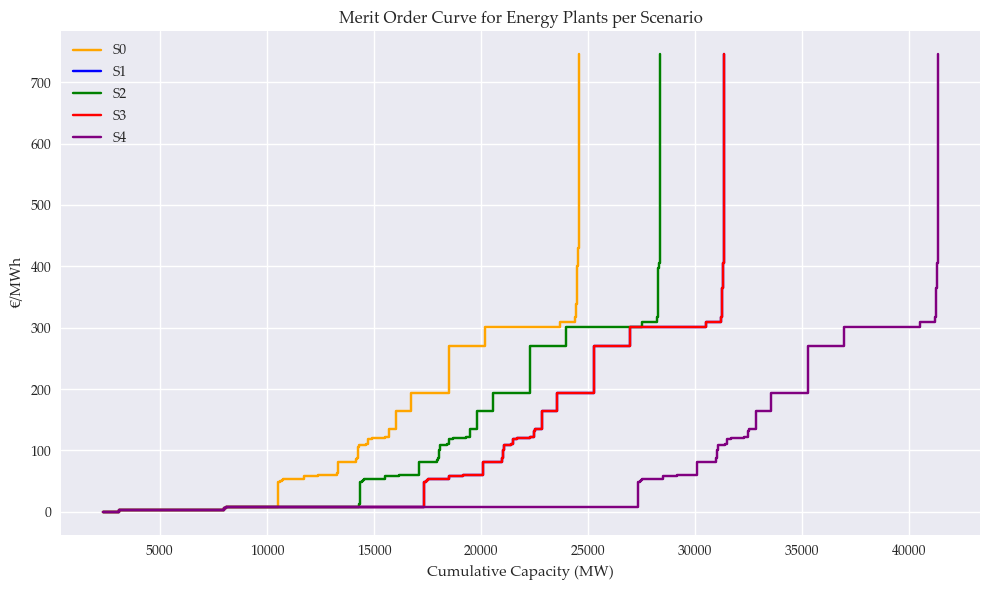

In [27]:
MOC('E') #Note Blue line is behind red because of same capacity added :)

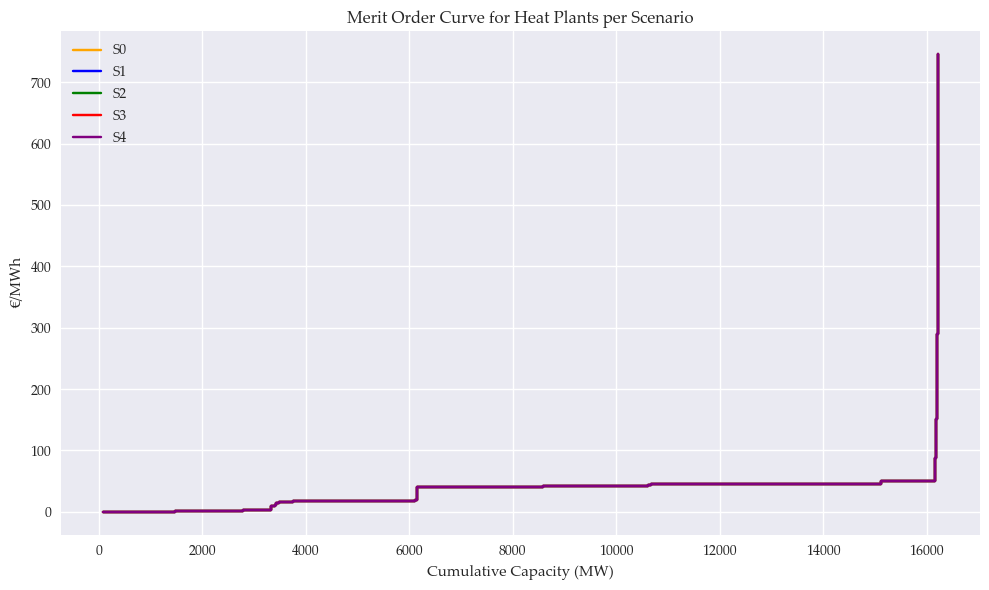

In [28]:
MOC('H')

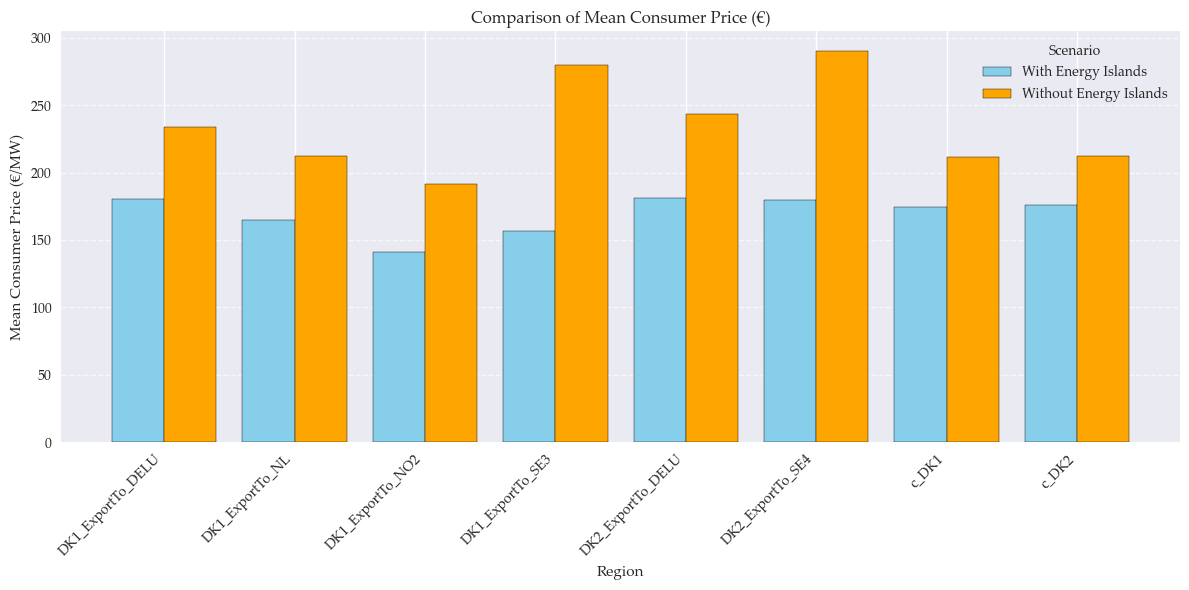

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""
Approximates shadow price for energy generation (lambda)
"""

# Assuming db and dbtake1 are databases with the same structure
# Process the first database
mean_consumer_price_db = db['meanConsumerPrice_E'].reset_index()  # Reset index to columns
mean_consumer_price_db['source'] = 'With Energy Islands'

# Process the second database
mean_consumer_price_take1 = dbtake1['meanConsumerPrice_E'].reset_index()  # Reset index to columns
mean_consumer_price_take1['source'] = 'Without Energy Islands'

# Combine both datasets into one DataFrame
combined_prices = pd.concat([mean_consumer_price_db, mean_consumer_price_take1])

# Rename columns for clarity
combined_prices.rename(columns={'c_E': 'Region', 0: 'Mean Consumer Price (€)'}, inplace=True)

# Create unique regions for consistent ordering
regions = combined_prices['Region'].unique()
x = np.arange(len(regions))  # X positions for each region

# Separate the data for the two sources
with_energy = combined_prices[combined_prices['source'] == 'With Energy Islands']
without_energy = combined_prices[combined_prices['source'] == 'Without Energy Islands']

# Align both datasets by region to ensure side-by-side plotting
with_energy = with_energy.set_index('Region').reindex(regions).reset_index()
without_energy = without_energy.set_index('Region').reindex(regions).reset_index()

# Bar width for side-by-side alignment
bar_width = 0.4

# Plot the bars
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(
    x - bar_width / 2,  # Shift left for "With Energy Islands"
    with_energy['Mean Consumer Price (€)'], 
    width=bar_width, 
    label='With Energy Islands', 
    color='skyblue', 
    edgecolor='black'
)
ax.bar(
    x + bar_width / 2,  # Shift right for "Without Energy Islands"
    without_energy['Mean Consumer Price (€)'], 
    width=bar_width, 
    label='Without Energy Islands', 
    color='orange', 
    edgecolor='black'
)

# Customize the plot
ax.set_title('Comparison of Mean Consumer Price (€)')
ax.set_xlabel('Region')
ax.set_ylabel('Mean Consumer Price (€/MW)')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend(title='Scenario')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


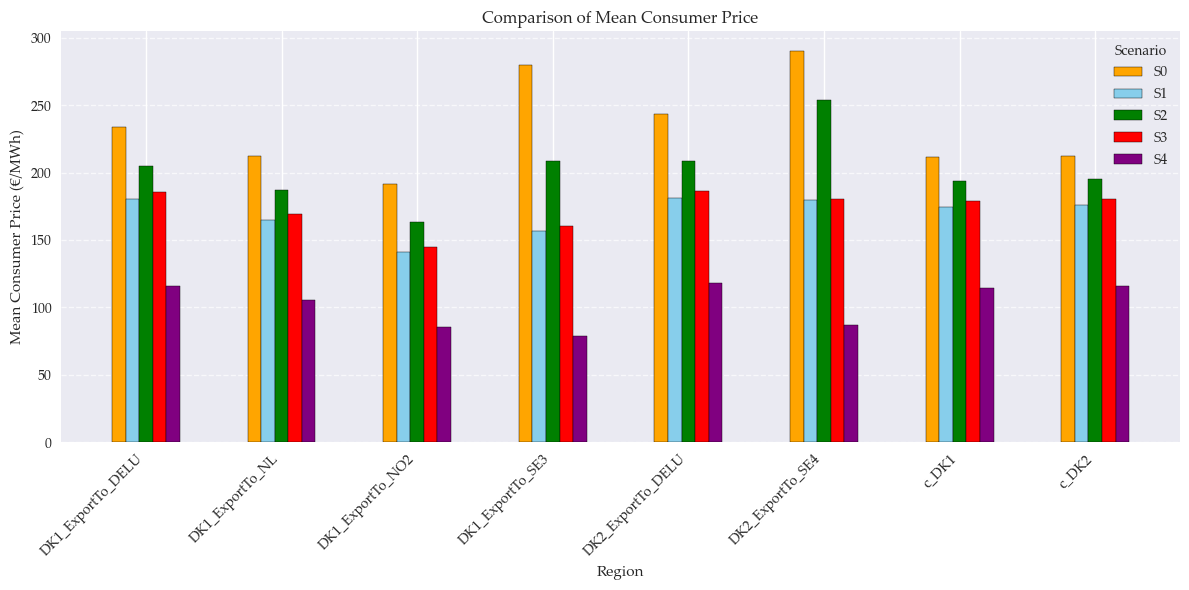

In [30]:
"""
Consumer Mean Price comparison

Approximates shadow price for energy generation (lambda)
"""

# Process each database and append a 'source' column
databases = {
    'S0': dbtake1,
    'S1': db,
    'S2': dbonlybornholm,
    'S3': dbbornholm_full,
    'S4': dball
}

# Initialize an empty list to collect data
combined_prices = []

# Loop over the databases and process them
for label, database in databases.items():
    mean_consumer_price = database['meanConsumerPrice_E'].reset_index()  # Reset index to columns
    mean_consumer_price['source'] = label
    combined_prices.append(mean_consumer_price)

# Concatenate all the data into one DataFrame
combined_prices = pd.concat(combined_prices)

# Rename columns for clarity
combined_prices.rename(columns={'c_E': 'Region', 0: 'Mean Consumer Price (€)'}, inplace=True)

# Create unique regions for consistent ordering
regions = combined_prices['Region'].unique()
x = np.arange(len(regions))  # X positions for each region

# Separate the data for each source
separated_data = {label: combined_prices[combined_prices['source'] == label] for label in databases.keys()}

# Align all datasets by region to ensure side-by-side plotting
for label, data in separated_data.items():
    separated_data[label] = data.set_index('Region').reindex(regions).reset_index()

# Bar width for side-by-side alignment
bar_width = 0.1  # Adjusted to fit more bars side-by-side

# Define colors for each source
colors = {
    'S0': 'orange',
    'S1': 'skyblue',
    'S2': 'green',
    'S3': 'red',
    'S4': 'purple',
}

# Plot the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Loop to plot each source
for i, (label, data) in enumerate(separated_data.items()):
    ax.bar(
        x + (i - 2) * bar_width,  # Shift for side-by-side positioning
        data['Mean Consumer Price (€)'], 
        width=bar_width, 
        label=label, 
        color=colors[label], 
        edgecolor='black'
    )

# Customize the plot
ax.set_title('Comparison of Mean Consumer Price')
ax.set_xlabel('Region')
ax.set_ylabel('Mean Consumer Price (€/MWh)')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend(title='Scenario')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


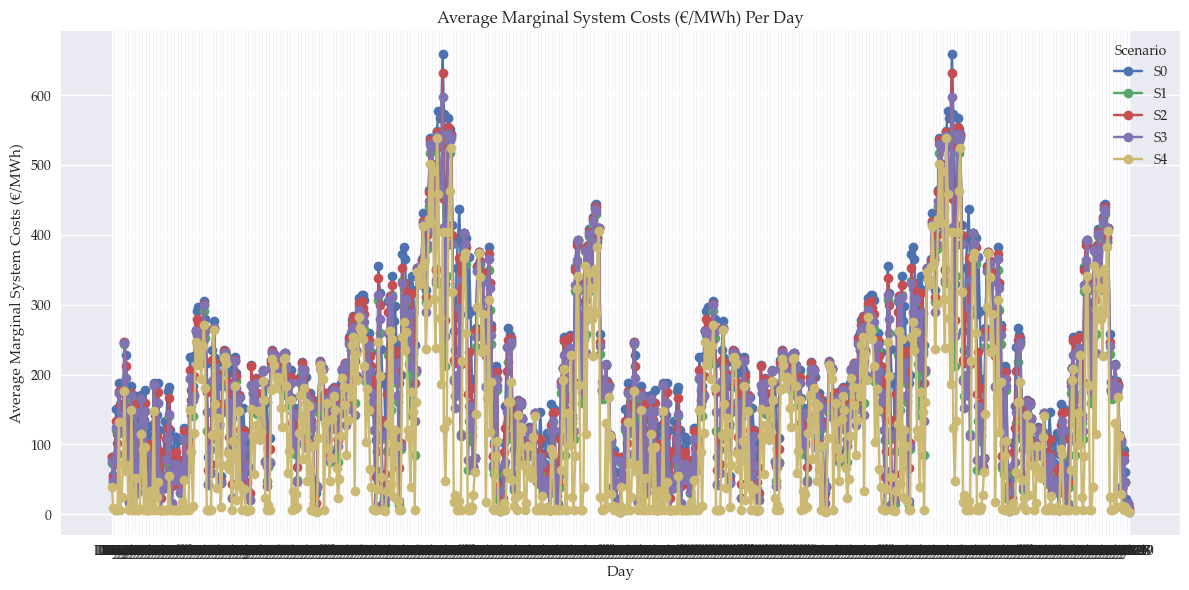

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of databases with corresponding labels
databases = {
    'S0': dbtake1,
    'S1': db,
    'S2': dbonlybornholm,
    'S3': dbbornholm_full,
    'S4': dball
}

# Number of hours per day
hours_per_day = 24

# Initialize a DataFrame to store the average marginal system costs for each database
averaged_costs = pd.DataFrame(columns=databases.keys())

# Loop over the databases and calculate the average for each 24-hour period (per day)
for label, database in databases.items():
    # Extract 'marginalSystemCosts_E' data for the current database
    marginal_system_costs = database['marginalSystemCosts_E'].reset_index(drop=True)
    
    # Calculate the number of full days
    days = len(marginal_system_costs) // hours_per_day
    
    # Split the data into 24-hour chunks (1 day) and calculate the average for each day
    avg_costs = [
        marginal_system_costs[i:i+hours_per_day].mean() 
        for i in range(0, days * hours_per_day, hours_per_day)
    ]
    
    # Store the averaged costs in the DataFrame
    averaged_costs[label] = avg_costs

# Plot the averaged marginal system costs as a line graph
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each database as a line on the graph
for label in databases.keys():
    ax.plot(averaged_costs.index + 1, averaged_costs[label], label=label, marker='o')

# Customize the plot
ax.set_title('Average Marginal System Costs (€/MWh) Per Day')
ax.set_xlabel('Day')
ax.set_ylabel('Average Marginal System Costs (€/MWh)')
ax.set_xticks(np.arange(1, len(averaged_costs) + 1, step=1))  # Show days from 1 to N
ax.set_xticklabels([f'Day {i+1}' for i in range(len(averaged_costs))])  # Label the days
ax.legend(title='Scenario', loc='best')  # Legend for each database
ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


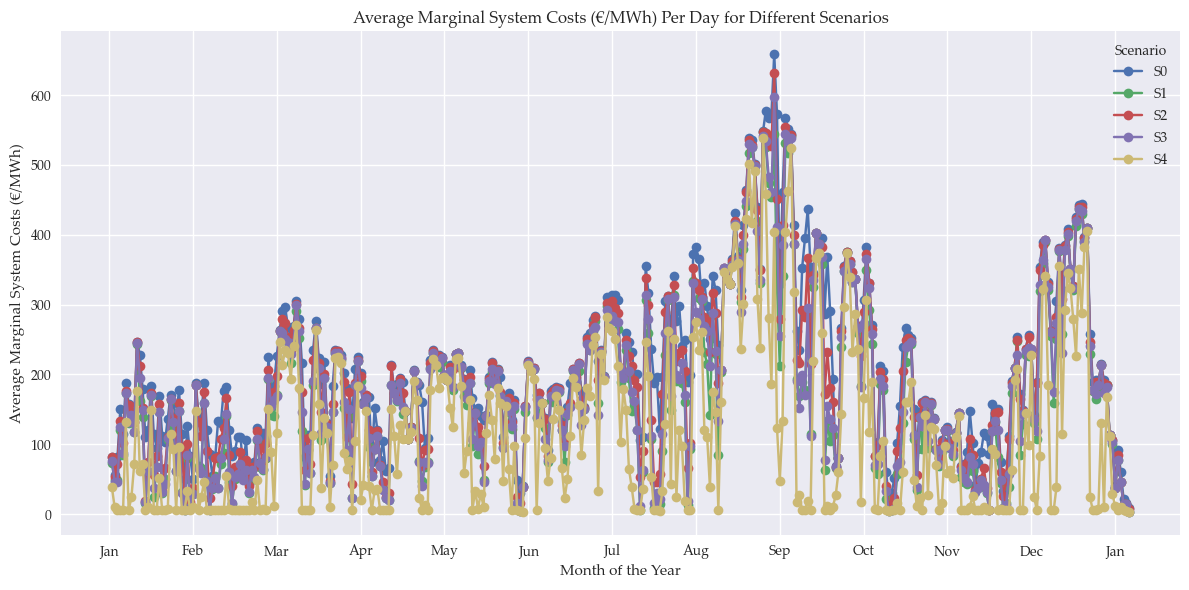

In [32]:
#Marginal System Costs for DK1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of databases with corresponding labels
databases = {
    'S0': dbtake1,
    'S1': db,
    'S2': dbonlybornholm,
    'S3': dbbornholm_full,
    'S4': dball
}

# Number of hours per day and total hours in a year
hours_per_day = 24
total_hours = 8760  # Total hours in a year

# Create a plot
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each database to process and plot the data
for label, database in databases.items():
    # Extract 'marginalSystemCosts_E' for the 'DK1' region
    marginal_system_costs = database['marginalSystemCosts_E']['DK1'].reset_index(drop=True)

    # Check that the data has 8760 hours
    if len(marginal_system_costs) != total_hours:
        raise ValueError(f"The data for {label} does not have 8760 hours. Length is {len(marginal_system_costs)}.")

    # Average the marginal system costs for each day (24 hours per day)
    daily_avg_costs = [
        marginal_system_costs[i:i + hours_per_day].mean()
        for i in range(0, total_hours, hours_per_day)
    ]

    # Plot the data for the current database
    ax.plot(np.arange(1, 366), daily_avg_costs, label=label, marker='o')

# Customize the plot
ax.set_title('Average Marginal System Costs (€/MWh) Per Day for Different Scenarios')
ax.set_xlabel('Month of the Year')
ax.set_ylabel('Average Marginal System Costs (€/MWh)')

# Adjust the tick positions to show every 30 days, and update labels for each month
ax.set_xticks(np.arange(0, 366, 30))  # Show every 30 days (for months)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan'])  # Month names (13 months to cover the entire year)

# Show legend for each database
ax.legend(title='Scenario', loc='best')

# Enable grid
ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


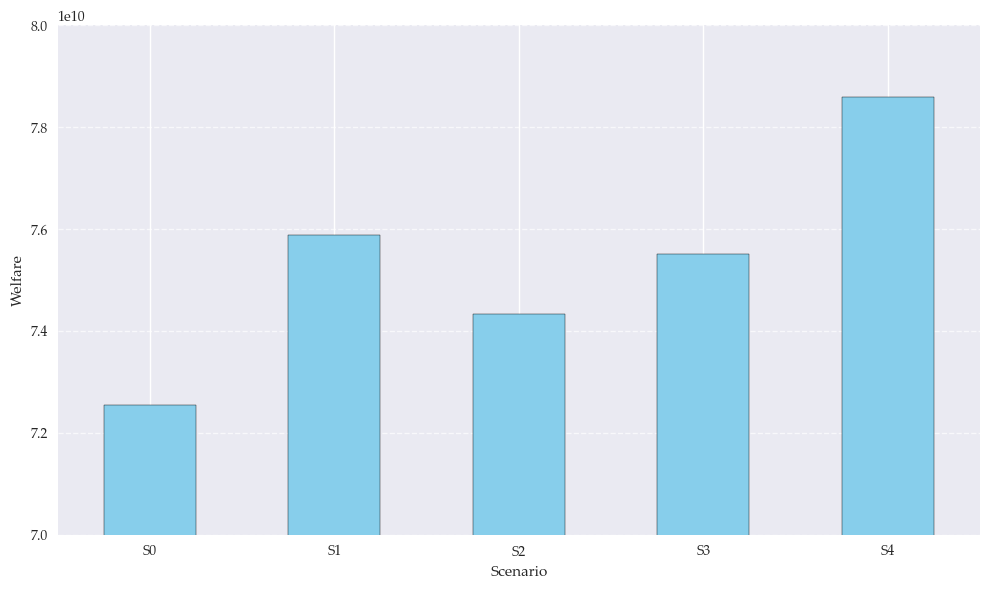

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# List of databases with corresponding labels
databases = {
    'S0': dbtake1,
    'S1': db,
    'S2': dbonlybornholm,
    'S3': dbbornholm_full,
    'S4': dball
}

# Initialize a dictionary to store Welfare values
welfare_values = {}

# Extract 'Welfare' from each database
for label, database in databases.items():
    welfare_values[label] = database['Welfare']

# Create a DataFrame for visualization
welfare_df = pd.DataFrame.from_dict(welfare_values, orient='index', columns=['Welfare'])

# Plot the column graph
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
welfare_df['Welfare'].plot(
    kind='bar', 
    ax=ax, 
    color='skyblue', 
    edgecolor='black'
)

# Customize the plot
#ax.set_title('Welfare Values Across Databases')
ax.set_ylabel('Welfare')
ax.set_xlabel('Scenario')
ax.set_xticklabels(welfare_df.index, rotation=0)  # Ensure labels are horizontal
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_ylim(7e10, 8e10)

# Show the plot
plt.tight_layout()
plt.show()
